Model: XGBoost
Cross-validation mean accuracy: 0.9895
Training set accuracy: 0.9983
Validation set accuracy: 0.9900
Training set error: 0.0017
Validation set error: 0.0100



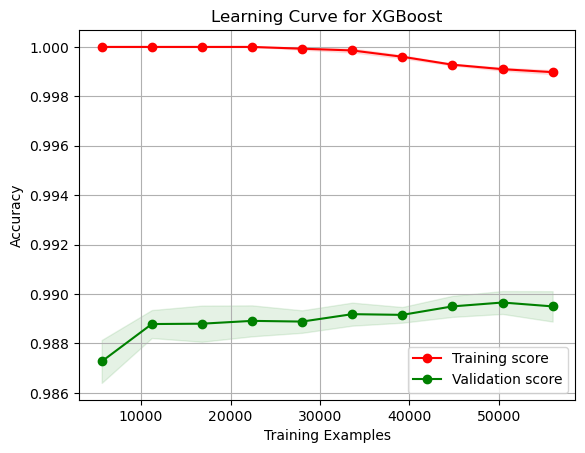

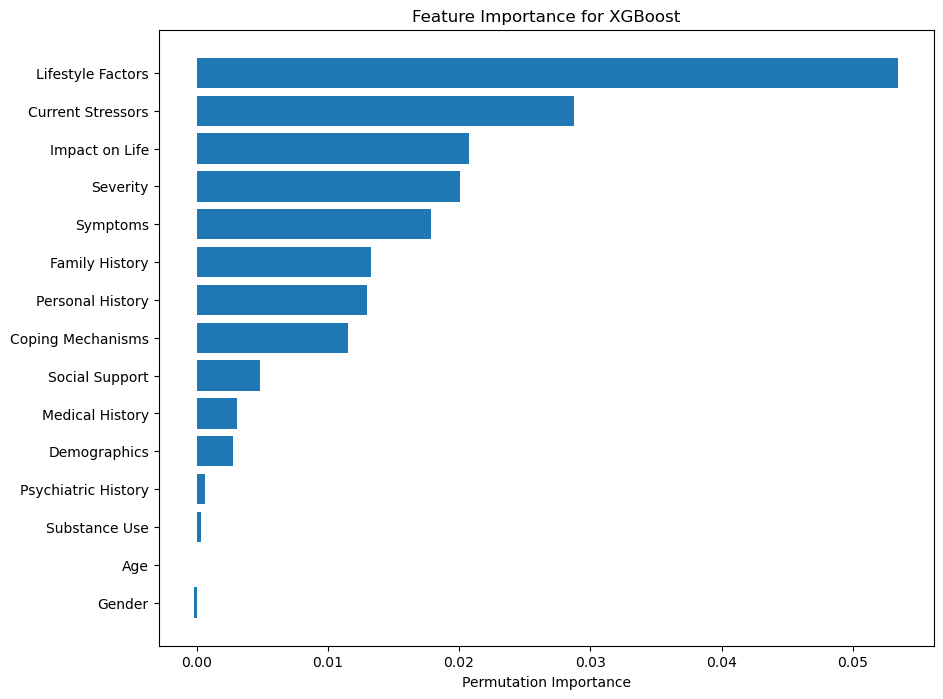

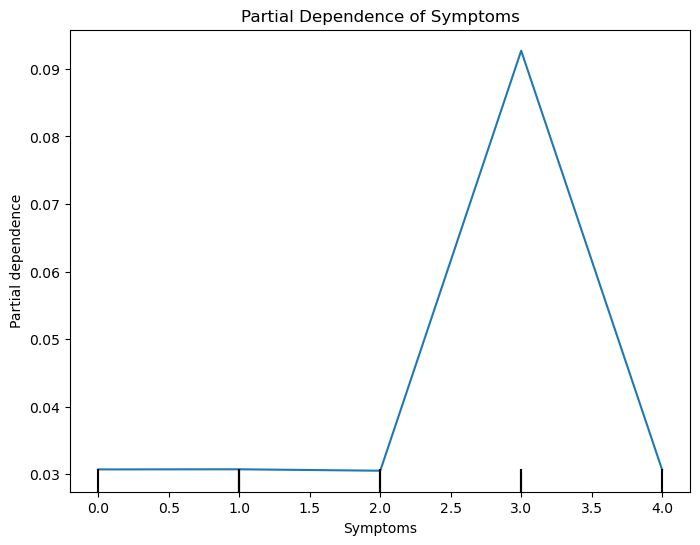

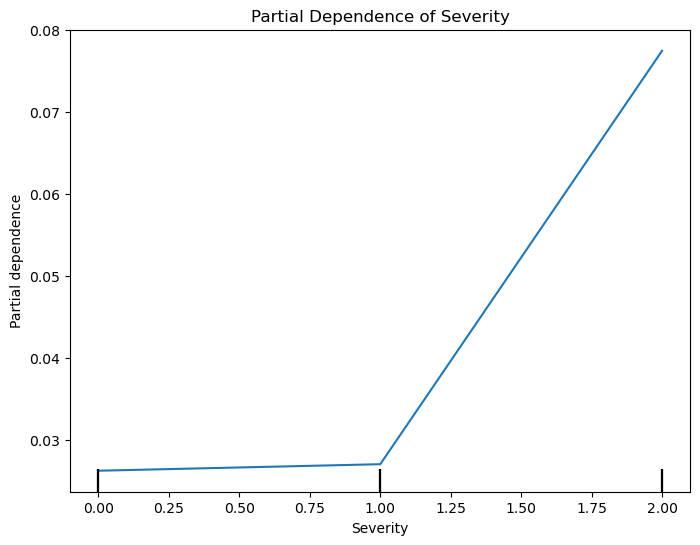

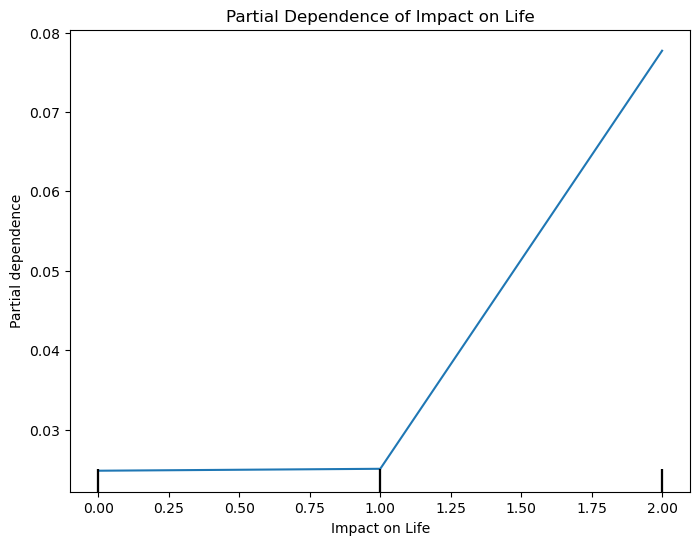

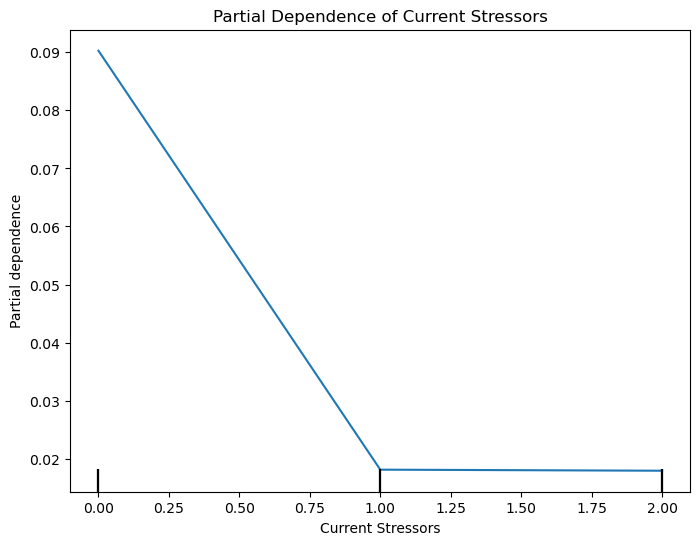

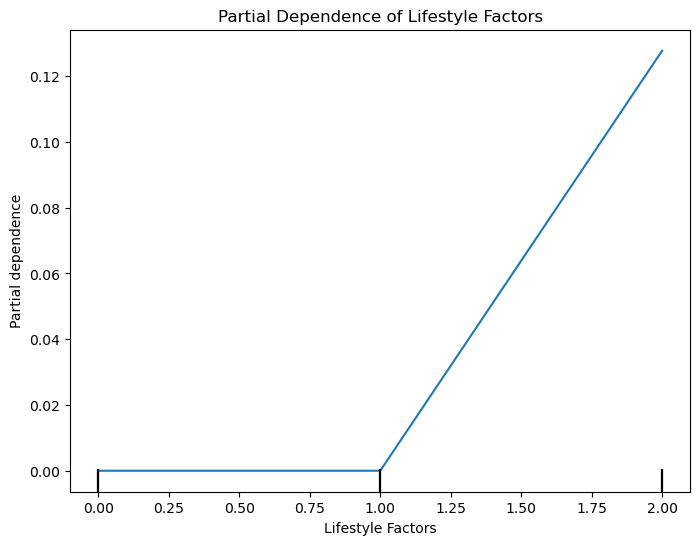

In [1]:
# Preprocessing, Cross-validate

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

# Load datasets
df_train = pd.read_csv('panic_disorder_dataset_training.csv')
df_test = pd.read_csv('panic_disorder_dataset_testing.csv')

# Drop Participant ID from training and test data
df_train = df_train.drop(columns=['Participant ID'])
df_test = df_test.drop(columns=['Participant ID'])

# Features and target
X = df_train.drop(columns=['Panic Disorder Diagnosis'])
y = df_train['Panic Disorder Diagnosis']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Identify categorical and numerical features
categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Impute missing values
imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_num = SimpleImputer(strategy='mean')

# Apply imputation
X_train[categorical_features] = imputer_cat.fit_transform(X_train[categorical_features])
X_val[categorical_features] = imputer_cat.transform(X_val[categorical_features])
X_train[numerical_features] = imputer_num.fit_transform(X_train[numerical_features])
X_val[numerical_features] = imputer_num.transform(X_val[numerical_features])

# Label encode categorical features
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_val[col] = le.transform(X_val[col])
    label_encoders[col] = le

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'  # Keep the rest of the features as they are
)

# Define model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Cross-validation and learning curve plotting
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Cross-validate model
cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)

# Fit the model on the training set and evaluate on the validation set
pipeline.fit(X_train, y_train)
train_score = pipeline.score(X_train, y_train)
val_score = pipeline.score(X_val, y_val)

# Calculate training and validation errors
train_error = 1 - train_score
val_error = 1 - val_score

# Print model performance
print(f"Model: XGBoost")
print(f"Cross-validation mean accuracy: {cv_results.mean():.4f}")
print(f"Training set accuracy: {train_score:.4f}")
print(f"Validation set accuracy: {val_score:.4f}")
print(f"Training set error: {train_error:.4f}")
print(f"Validation set error: {val_error:.4f}\n")

# Plot learning curve
train_sizes, train_scores, val_scores = learning_curve(pipeline, X_train, y_train, cv=kfold, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure()
plt.title(f'Learning Curve for XGBoost')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label='Validation score')

plt.legend(loc='best')
plt.show()

# Compute permutation importance
perm_importance = permutation_importance(pipeline, X_val, y_val, n_repeats=10, random_state=42)
perm_sorted_idx = perm_importance.importances_mean.argsort()

# Get the feature names after preprocessing
feature_names = list(numerical_features) + list(categorical_features)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(range(len(perm_sorted_idx)), perm_importance.importances_mean[perm_sorted_idx], align='center')
plt.yticks(range(len(perm_sorted_idx)), np.array(feature_names)[perm_sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance for XGBoost")
plt.show()

# Plot partial dependence for the most important features
top_features = np.array(feature_names)[perm_sorted_idx][-5:]  # top 5 features
for feature in top_features:
    fig, ax = plt.subplots(figsize=(8, 6))
    PartialDependenceDisplay.from_estimator(pipeline, X_train, [feature], ax=ax)
    plt.title(f'Partial Dependence of {feature}')
    plt.show()


ModuleNotFoundError: No module named 'optuna'

In [3]:
pip install optuna


   ---------------------------------------- 0.0/380.1 kB ? eta -:--:--
   ---- ---------------------------------- 41.0/380.1 kB 991.0 kB/s eta 0:00:01
   ------------------------ --------------- 235.5/380.1 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 380.1/380.1 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/233.4 kB ? eta -:--:--
   --------------------------------------- 233.4/233.4 kB 13.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/78.6 kB ? eta -:--:--
   ---------------------------------------- 78.6/78.6 kB ? eta 0:00:00


In [9]:
pip install optuna ipywidgets --upgrade


   ---------------------------------------- 0.0/139.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/139.4 kB ? eta -:--:--
   -------- ------------------------------ 30.7/139.4 kB 640.0 kB/s eta 0:00:01
   -------------------------------------- - 133.1/139.4 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 139.4/139.4 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/214.4 kB ? eta -:--:--
   ---------------------------------------- 214.4/214.4 kB 4.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------- -------------------------- 0.8/2.3 MB 24.0 MB/s eta 0:00:01
   ---------------------------------------  2.3/2.3 MB 29.8 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 24.7 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.5.2
    Uninstalling widgetsnbextension-3.5.2:
      Successfully uni

In [10]:
# Add Optuna hyperparameter tuning at the end
import optuna
from optuna.samplers import TPESampler

# Define the objective function for Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 400),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 0.3),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 5)
    }

    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, **param)
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)
    
    return scores.mean()

# Create the Optuna study with pruning
study = optuna.create_study(direction='maximize', sampler=TPESampler(), pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=200, n_jobs=-1, show_progress_bar=True)

# Best parameters from the study
best_params = study.best_params
print("Best parameters found: ", best_params)




[I 2024-06-08 20:11:35,026] A new study created in memory with name: no-name-25631b79-b75a-45fc-8899-2ebe5c46f156


  0%|          | 0/200 [00:00<?, ?it/s]

[I 2024-06-08 20:11:42,509] Trial 1 finished with value: 0.9896428542815278 and parameters: {'n_estimators': 341, 'max_depth': 10, 'learning_rate': 0.044807403375891126, 'subsample': 0.8612909413412562, 'colsample_bytree': 0.65056386406584, 'gamma': 0.06962681011319245, 'min_child_weight': 4}. Best is trial 1 with value: 0.9896428542815278.
[I 2024-06-08 20:11:43,386] Trial 0 finished with value: 0.9897428446898688 and parameters: {'n_estimators': 356, 'max_depth': 9, 'learning_rate': 0.06649182517304972, 'subsample': 0.6104483332232452, 'colsample_bytree': 0.8963901512341974, 'gamma': 0.029573611206593197, 'min_child_weight': 3}. Best is trial 0 with value: 0.9897428446898688.
[I 2024-06-08 20:11:46,554] Trial 2 finished with value: 0.9898714240775627 and parameters: {'n_estimators': 313, 'max_depth': 9, 'learning_rate': 0.06792402489221538, 'subsample': 0.7993445090178797, 'colsample_bytree': 0.9667561989322663, 'gamma': 0.28104572321410554, 'min_child_weight': 4}. Best is trial 2 wi

Validation accuracy of the best model: 0.9908


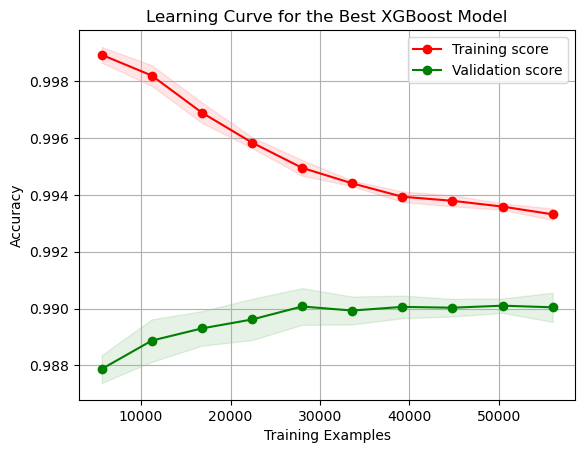

In [11]:
best_params = {
    'n_estimators': 353,
    'max_depth': 4,
    'learning_rate': 0.07639730394446925,
    'subsample': 0.9769972567915909,
    'colsample_bytree': 0.8641799601859603,
    'gamma': 0.05958068943077993,
    'min_child_weight': 4
}

# Use the best parameters to create a model
best_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, **best_params)

# Create the pipeline with the best model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', best_model)
])

# Fit the pipeline on the full training set
pipeline.fit(X_train, y_train)

# Evaluate on the validation set
val_predictions = pipeline.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation accuracy of the best model: {val_accuracy:.4f}")

# Plot learning curve of the best model
train_sizes, train_scores, val_scores = learning_curve(pipeline, X_train, y_train, cv=kfold, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure()
plt.title('Learning Curve for the Best XGBoost Model')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label='Validation score')

plt.legend(loc='best')
plt.show()

Training accuracy: 0.9929
Validation accuracy: 0.9908
Training error: 0.0071
Validation error: 0.0092


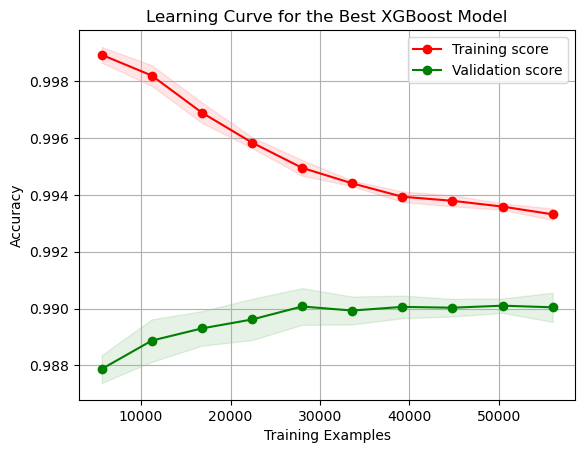

In [12]:
# Evaluate on the training set
train_predictions = pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
train_error = 1 - train_accuracy

# Evaluate on the validation set
val_predictions = pipeline.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
val_error = 1 - val_accuracy

# Print the metrics
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Validation accuracy: {val_accuracy:.4f}")
print(f"Training error: {train_error:.4f}")
print(f"Validation error: {val_error:.4f}")

# Plot learning curve of the best model
train_sizes, train_scores, val_scores = learning_curve(pipeline, X_train, y_train, cv=kfold, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure()
plt.title('Learning Curve for the Best XGBoost Model')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label='Validation score')

plt.legend(loc='best')
plt.show()


Training accuracy: 0.9929
Validation accuracy: 0.9908
Testing accuracy: 0.9911
Training error: 0.0071
Validation error: 0.0092
Testing error: 0.0089


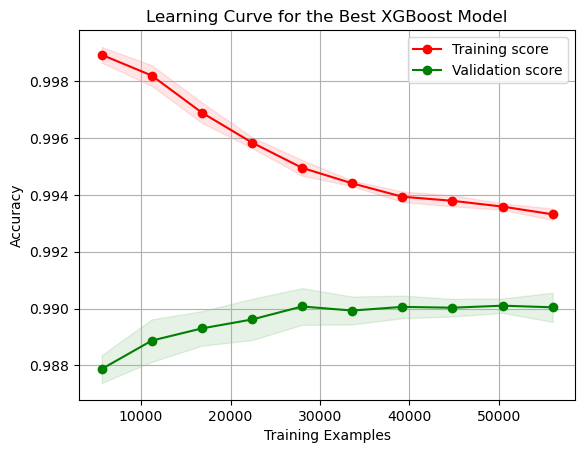

In [13]:
# Assuming best_params and pipeline are already defined as shown in your code

# Fit the pipeline on the full training set
pipeline.fit(X_train, y_train)

# Evaluate on the training set
train_predictions = pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
train_error = 1 - train_accuracy

# Evaluate on the validation set
val_predictions = pipeline.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
val_error = 1 - val_accuracy

# Load and preprocess the test set
df_test = pd.read_csv('panic_disorder_dataset_testing.csv')
df_test = df_test.drop(columns=['Participant ID'])
X_test = df_test.drop(columns=['Panic Disorder Diagnosis'])
y_test = df_test['Panic Disorder Diagnosis']

X_test[categorical_features] = imputer_cat.transform(X_test[categorical_features])
X_test[numerical_features] = imputer_num.transform(X_test[numerical_features])
for col in categorical_features:
    le = label_encoders[col]
    X_test[col] = le.transform(X_test[col])

# Evaluate on the test set
test_predictions = pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
test_error = 1 - test_accuracy

# Print the metrics
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Validation accuracy: {val_accuracy:.4f}")
print(f"Testing accuracy: {test_accuracy:.4f}")
print(f"Training error: {train_error:.4f}")
print(f"Validation error: {val_error:.4f}")
print(f"Testing error: {test_error:.4f}")

# Plot learning curve of the best model
train_sizes, train_scores, val_scores = learning_curve(pipeline, X_train, y_train, cv=kfold, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure()
plt.title('Learning Curve for the Best XGBoost Model')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label='Validation score')

plt.legend(loc='best')
plt.show()


In [15]:
# Extract feature importances
best_model = pipeline.named_steps['classifier']
feature_importances = best_model.feature_importances_

# Get feature names from your preprocessor
feature_names = list(numerical_features) + list(categorical_features)

# Combine feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'XGBoost Importance': feature_importances})

# Sort the dataframe by importance
feature_importance_df = feature_importance_df.sort_values(by='XGBoost Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)


                Feature  XGBoost Importance
14    Lifestyle Factors            0.504852
6              Severity            0.095438
2        Family History            0.076442
4     Current Stressors            0.075464
7        Impact on Life            0.065972
5              Symptoms            0.064504
3      Personal History            0.035729
13       Social Support            0.024029
12    Coping Mechanisms            0.023138
8          Demographics            0.012005
9       Medical History            0.009131
10  Psychiatric History            0.005238
11        Substance Use            0.004424
0                   Age            0.001903
1                Gender            0.001731


In [16]:
from sklearn.metrics import accuracy_score

# Assuming pipeline is already defined and trained
pipeline.fit(X_train, y_train)

# Predictions
train_predictions = pipeline.predict(X_train)
val_predictions = pipeline.predict(X_val)
test_predictions = pipeline.predict(X_test)

# Accuracy calculation function for feature levels
def calculate_feature_level_accuracy(feature, X, y, predictions):
    levels = X[feature].unique()
    accuracy_dict = {}
    for level in levels:
        mask = X[feature] == level
        level_accuracy = accuracy_score(y[mask], predictions[mask])
        accuracy_dict[level] = level_accuracy
    return accuracy_dict

# Define the features to analyze
features_to_analyze = [
    'Age', 'Gender', 'Family History', 'Personal History', 'Severity', 
    'Impact on Life', 'Demographics', 'Medical History', 'Psychiatric History', 
    'Substance Use', 'Coping Mechanisms', 'Social Support', 'Current Stressors', 
    'Symptoms', 'Lifestyle Factors'
]

# Calculate accuracy for each feature level in the validation set
accuracy_results = {}
for feature in features_to_analyze:
    accuracy_results[feature] = calculate_feature_level_accuracy(feature, X_val, y_val, val_predictions)

# Print the results
for feature, accuracies in accuracy_results.items():
    print(f"Feature: {feature}")
    for level, accuracy in accuracies.items():
        print(f"  Level: {level} - Accuracy: {accuracy:.3f}")

# Example output format for LaTeX table
for feature, accuracies in accuracy_results.items():
    for level, accuracy in accuracies.items():
        print(f"{feature} ({level}): {accuracy:.3f}")


Feature: Age
  Level: 25.0 - Accuracy: 0.991
  Level: 47.0 - Accuracy: 0.996
  Level: 23.0 - Accuracy: 0.995
  Level: 62.0 - Accuracy: 0.990
  Level: 59.0 - Accuracy: 0.990
  Level: 28.0 - Accuracy: 0.991
  Level: 36.0 - Accuracy: 0.988
  Level: 61.0 - Accuracy: 0.992
  Level: 53.0 - Accuracy: 0.994
  Level: 21.0 - Accuracy: 0.984
  Level: 18.0 - Accuracy: 0.990
  Level: 54.0 - Accuracy: 0.994
  Level: 55.0 - Accuracy: 0.989
  Level: 32.0 - Accuracy: 0.993
  Level: 49.0 - Accuracy: 0.988
  Level: 57.0 - Accuracy: 0.989
  Level: 34.0 - Accuracy: 0.992
  Level: 60.0 - Accuracy: 0.990
  Level: 41.0 - Accuracy: 0.997
  Level: 56.0 - Accuracy: 0.990
  Level: 45.0 - Accuracy: 0.992
  Level: 27.0 - Accuracy: 0.990
  Level: 52.0 - Accuracy: 0.989
  Level: 37.0 - Accuracy: 0.995
  Level: 29.0 - Accuracy: 0.991
  Level: 65.0 - Accuracy: 0.994
  Level: 63.0 - Accuracy: 0.990
  Level: 42.0 - Accuracy: 0.989
  Level: 30.0 - Accuracy: 0.986
  Level: 46.0 - Accuracy: 0.984
  Level: 39.0 - Accuracy: 0

In [17]:

import pickle

# Save the pruned Decision Tree model to a pickle file
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)